*Производная в точке*
$$
\frac{df}{du}(a) = \lim_{\Delta \to 0} \frac{f(a + \Delta) - f(a - \Delta)}{2 \Delta}
$$

*Можно оценить*
$$
\frac{df}{du}(a) \approx  \frac{f(a + 0.0001) - f(a - 0.0001)}{0.0002}
$$

**Пример вычисления производной**

In [1]:
from typing import Callable 
import numpy as np

def deriv(func: Callable[[np.ndarray], np.ndarray], input_: np.ndarray, delta: float = 0.001) -> np.ndarray:
    '''
    Вычисление производной функции func в каждой точке массива input_
    '''
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

*Вложенные функции*
$$
f_2(f_1(x)) = y
$$


$ x  ->  f_1  ->  f_2  ->  y $

**Пример кода вложенных функций**

In [2]:
from typing import List

Array_Function = Callable[[np.ndarray], np.ndarray]

Chain = List[Array_Function]

def chain_length_2(chain: Chain, a: np.ndarray) -> np.ndarray:
    '''
    вычисляет подряд значение вложенной функции в точке a
    '''
    assert len(chain) == 2, 'в цепочке должно быть 2 функции'
    f1 = chain[0]
    f2 = chain[1]
    return f2(f1(a))

**Сигмоида**

In [3]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))

*Производная сложной функции*
$$
\frac{df_2}{du}(x) = \frac{df_2}{du}(f_1(x)) * \frac{df_1}{du}(x)
$$

*Код для цепного правила*

In [4]:
def chain_deriv_2(chain: Chain, input_range: np.ndarray) -> np.ndarray:
    assert len(chain) == 2, 'Длина chain должна быть 2'
    f1 = chain[0]
    f2 = chain[1]
    f1_x = f1(input_range)
    df1_x = deriv(f1, input_range)
    df2_f1_x = deriv(f2, f1_x)
    return df2_f1_x * df1_x

In [5]:
def leaky_relu(x: np.ndarray) -> np.ndarray:
    return np.where(x >= 0, x, 0.2 * x)

In [6]:
def square(x: np.ndarray) -> np.ndarray:
    return x ** 2

In [7]:
def identity(x: np.ndarray) -> np.ndarray:
    return x

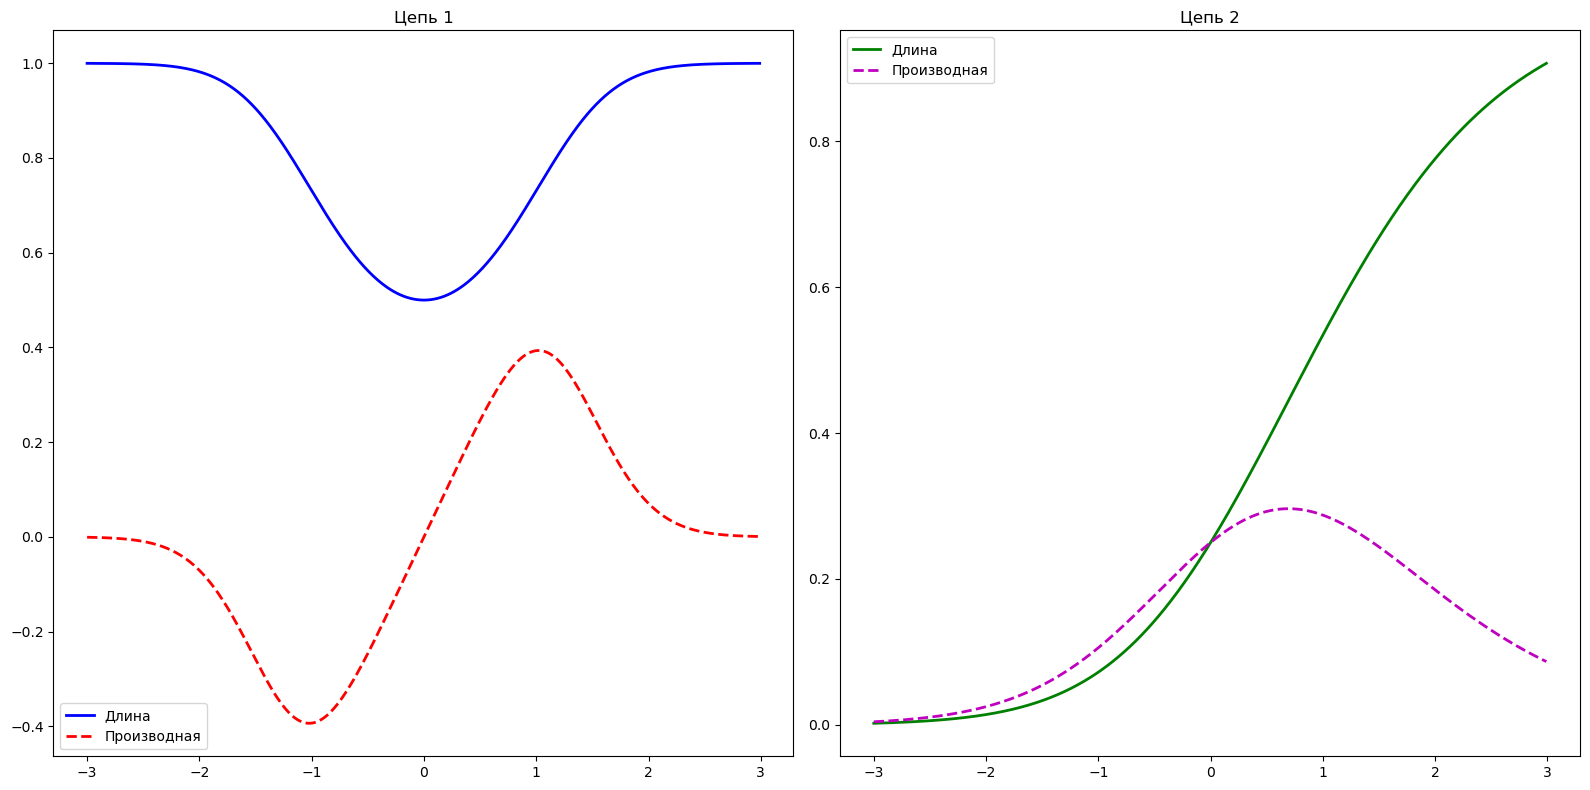

In [10]:
import matplotlib.pyplot as plt

plot_range = np.arange(-3, 3, 0.01)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

ax1.plot(plot_range, chain_length_2(chain_1, plot_range), 'b-', linewidth=2, label='Длина')
ax1.plot(plot_range, chain_deriv_2(chain_1, plot_range), 'r--', linewidth=2, label='Производная')

ax2.plot(plot_range, chain_length_2(chain_2, plot_range), 'g-', linewidth=2, label='Длина')
ax2.plot(plot_range, chain_deriv_2(chain_2, plot_range), 'm--', linewidth=2, label='Производная')

ax1.set_title('Цепь 1')
ax2.set_title('Цепь 2')

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

### Цепное правило для 3 функций

$$
\frac{df_3}{du}(x) = \frac{df_3}{du}(f_2(f_1(x))) * \frac{df_2}{du}(f_1(x)) * \frac{df_1}{du}(x)
$$

*Код для производной*

In [11]:
def chain_deriv_3(chain: Chain, input_range: np.ndarray) -> np.ndarray:
    assert len(chain) == 3, 'Длина цепочки должна быть 3'
    f1, f2, f3 = chain
    f1_x = f1(input_range)
    f2_x = f2(input_range)
    df1_x = deriv(f1, input_range)
    df2_f1 = deriv(f2, f1_x)
    df3_f2 = deriv(f3, f2_x)
    return df3_f2 * df2_f1 * df1_x

*Вычисление производной происходит в 2 этапа:*
1. Вычисление значений функций в оригинальной точке x.
2. Ипользование значений для вычисления производных.

*Первый этап* - прямой проход.<br>
*Второй этап* - обратный проход.

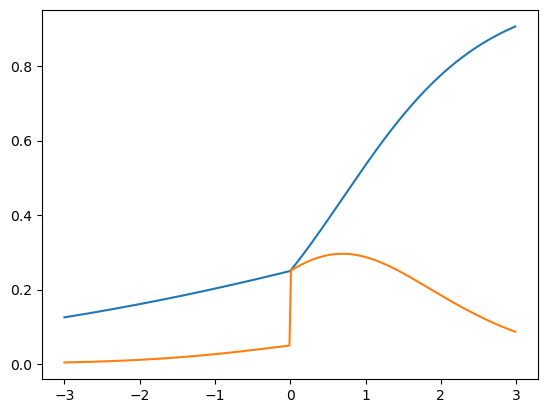

In [12]:
plot_range = np.arange(-3, 3, 0.01)

def chain_length_3(chain: Chain, a: np.ndarray) -> np.ndarray:
    '''
    вычисляет подряд значение вложенной функции в точке a
    '''
    assert len(chain) == 3, 'в цепочке должно быть 3 функции'
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    return f3(f2(f1(a)))

chain_3 = [leaky_relu, sigmoid, square]

plt.plot(plot_range, chain_length_3(chain_3, plot_range))
plt.plot(plot_range, chain_deriv_3(chain_3, plot_range))

plt.show()